In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 데이터 준비
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/기계학습 3주차/weather.csv")
df  # print(df) 와 동일

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [52]:
#칼럼명 확인을 해야됨.(label)
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [53]:
#칼럼명 확인 후 결측지 확인을 해야됨
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31


In [54]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [55]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [56]:
#레이블 불균형 확인
#어디에 초점이 맞춰져있는 데이터인지 확인.
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,268
Yes,60


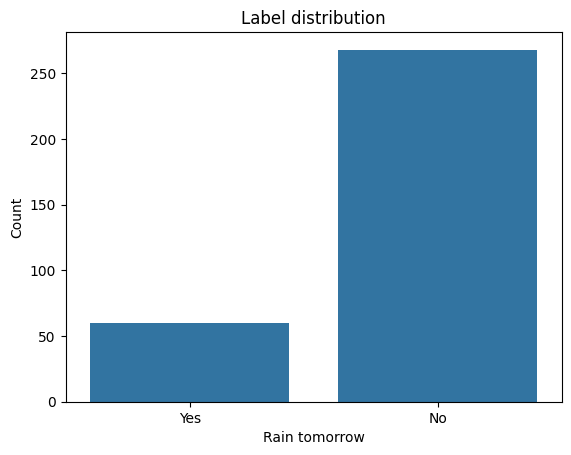

In [57]:
#레이블 갯수확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="RainTomorrow")
plt.xlabel("Rain tomorrow")   # 또는 "label", "내일 비"
plt.ylabel("Count")
plt.title("Label distribution")
plt.show()

In [58]:
df['Location'].value_counts()

,count
Location,
Canberra,328


In [59]:
# 이게 컬럼 삭제 소스코드
df = df.drop(columns=['Location'])

In [60]:
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [61]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [62]:
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,59,90,111,0,15,43,7,8,12,7,...,15,93,82,7,7,95,129,0,16,1
1,70,138,130,16,20,75,1,12,0,13,...,22,37,27,5,3,123,145,1,16,1
2,81,135,106,16,27,24,7,33,3,5,...,55,20,22,8,7,103,99,1,43,1
3,83,133,42,43,34,69,7,20,14,13,...,42,7,21,2,7,88,50,1,13,1
4,84,86,46,13,26,84,10,18,10,2,...,35,84,113,7,7,68,60,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,47,100,152,0,36,99,6,29,10,7,...,2,64,46,1,3,148,167,0,0,0
362,48,81,141,0,51,104,3,17,6,6,...,8,95,98,0,1,120,160,0,0,0
363,49,125,78,0,40,36,2,14,1,1,...,33,131,147,3,2,96,81,0,0,0
364,51,125,130,0,23,50,7,16,11,14,...,25,103,91,6,7,107,146,0,0,0


In [32]:
# 입력과 출력 분리

X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]

In [33]:
X

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,59,90,111,0,15,43,7,8,12,7,...,29,15,93,82,7,7,95,129,0,16
1,70,138,130,16,20,75,1,12,0,13,...,41,22,37,27,5,3,123,145,1,16
2,81,135,106,16,27,24,7,33,3,5,...,43,55,20,22,8,7,103,99,1,43
3,83,133,42,43,34,69,7,20,14,13,...,23,42,7,21,2,7,88,50,1,13
4,84,86,46,13,26,84,10,18,10,2,...,29,35,84,113,7,7,68,60,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,47,100,152,0,36,99,6,29,10,7,...,1,2,64,46,1,3,148,167,0,0
362,48,81,141,0,51,104,3,17,6,6,...,6,8,95,98,0,1,120,160,0,0
363,49,125,78,0,40,36,2,14,1,1,...,24,33,131,147,3,2,96,81,0,0
364,51,125,130,0,23,50,7,16,11,14,...,30,25,103,91,6,7,107,146,0,0


In [34]:
y

,RainTomorrow
0,1
1,1
2,1
3,1
4,0
...,...
361,0
362,0
363,0
364,0


In [35]:
# 훈련과 테스트 데이터 분리


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42

)

In [36]:
# 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((262, 22), (66, 22), (262,), (66,))

In [37]:
# -----------------------------
# 2) 모델 구성
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500)

In [64]:
#이 부분 GPT를 활용해서 이해해봐야됨.
#왜 스케일러가 필요한지? 모델 구성할 때 왜 임포트를 저걸 하는지 강의책을 확인해서 확인

#KNN 모델 구성
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


#스케일러가 필요한 이유
#데이터에서 큰값과 0~1근처의 값이 있는 컬럼이 동시에 존재할 경우
#knn은 거리기반 모델이라 큰값에 의해 의사결정이 왜곡될 가능성이 높음. 그러니 스케일러와 파이프라인 사용.
knn_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(
        n_neighbors=5,       # 이웃 수(이진이면 보통 홀수)
        weights="distance",  # 거리 가중치(멀수록 영향↓). 균일 가중치는 "uniform"
        metric="minkowski",  # p=2면 유클리드, p=1이면 맨해튼
        p=2
    ))
])

In [65]:
#KNN 사용 (학습/평가)

knn_clf.fit(X_train, y_train)
knn_y_pred = knn_clf.predict(X_test)

In [45]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [40]:
y_test

,RainTomorrow
365,0
28,0
36,1
301,0
305,0
...,...
356,0
72,1
320,0
81,0


In [67]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------


dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)


In [68]:
dt_y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [42]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))

=== DT Test Accuracy ===
Decision Tree : 1.0000
[[54  0]
 [ 0 12]]
=== RF Test Accuracy ===
Random Forest : 1.0000
[[54  0]
 [ 0 12]]
=== LR Test Accuracy ===
Logistic Reg. : 0.9848
[[53  1]
 [ 0 12]]


In [66]:
#KNN 정확도 평가
from sklearn.metrics import accuracy_score, confusion_matrix

knn_acc = accuracy_score(y_test, knn_y_pred)

print("=== KNN Test Accuracy ===")
print(f"KNN : {knn_acc:.4f}")
print(confusion_matrix(y_test, knn_y_pred))


=== KNN Test Accuracy ===
KNN : 0.9242
[[54  0]
 [ 5  7]]
